<a href="https://colab.research.google.com/github/Enishe1/WildVision/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyinaturalist


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 5.9 MB/s eta 0:00:00


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 3.9 MB/s eta 0:00:00
Fetching data for 100 species...
Fetching Lynx lynx... (Attempt 1)
Found 100 observations
Fetching Ursus arctos... (Attempt 1)
Found 100 observations
Fetching Canis lupus... (Attempt 1)
Found 100 observations
Fetching Capreolus capreolus... (Attempt 1)
Found 100 observations
Fetching Sus scrofa... (Attempt 1)
Found 100 observations
Fetching Martes martes... (Attempt 1)
Found 100 observations
Fetching Vulpes vulpes... (Attempt 1)
Found 100 observations
Fetching Lutra lutra... (Attempt 1)
Found 100 observations
Fetching Rupicapra rupicapra... (Attempt 1)
Found 100 observations
Fetching Myotis myotis... (Attempt 1)
Found 100 observations
Fetching Sciurus vulgaris... (Attempt 1)
Found 100 observations
Fetching Lepus europaeus... (Attempt 1)
Found 100 observa

<ipython-input-2-a888ebf7b7ee>:91: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat(standardized_dfs, ignore_index=True)



Success! Saved 9833 observations to bosnia_wildlife_observations_20250502_1136.csv
Species with data: 100/100

Top 10 most observed species:
target_species
Lynx lynx              100
Ursus arctos           100
Canis lupus            100
Capreolus capreolus    100
Sus scrofa             100
Martes martes          100
Vulpes vulpes          100
Lutra lutra            100
Rupicapra rupicapra    100
Myotis myotis          100
Name: count, dtype: int64

Preparing to display sample images...


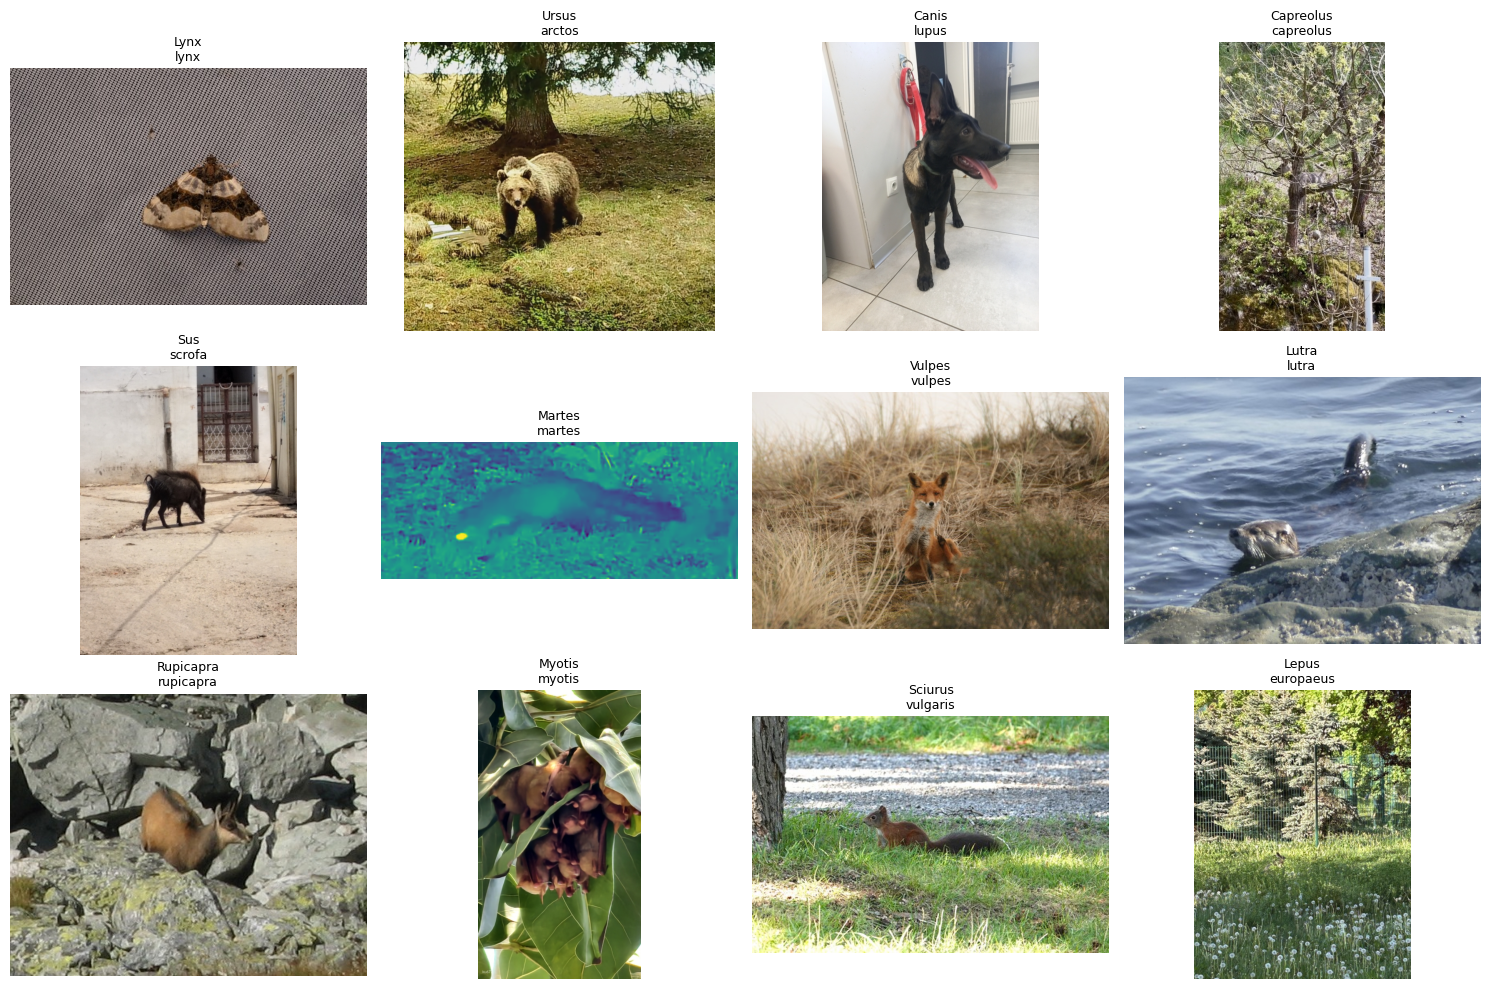

In [2]:
# Install required packages (run this first)
!pip install pyinaturalist pandas requests pillow matplotlib

import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
from pyinaturalist import get_observations
import pandas as pd
import time
from requests.exceptions import RequestException

# 100 species from Bosnia and Herzegovina
TARGET_SPECIES = [
    # Mammals (25)
    "Lynx lynx", "Ursus arctos", "Canis lupus", "Capreolus capreolus", "Sus scrofa",
    "Martes martes", "Vulpes vulpes", "Lutra lutra", "Rupicapra rupicapra", "Myotis myotis",
    "Sciurus vulgaris", "Lepus europaeus", "Felis silvestris", "Meles meles", "Neomys fodiens",
    "Cervus elaphus", "Dama dama", "Mustela nivalis", "Glis glis", "Talpa europaea",
    "Miniopterus schreibersii", "Rhinolophus ferrumequinum", "Nyctalus noctula", "Erinaceus europaeus", "Microtus arvalis",

    # Birds (35)
    "Aquila chrysaetos", "Falco peregrinus", "Bubo bubo", "Ciconia ciconia", "Picus viridis",
    "Lanius collurio", "Sitta europaea", "Turdus merula", "Emberiza citrinella", "Alcedo atthis",
    "Milvus migrans", "Corvus corax", "Parus major", "Motacilla alba", "Hirundo rustica",
    "Phylloscopus collybita", "Luscinia megarhynchos", "Accipiter nisus", "Strix aluco", "Apus apus",
    "Columba palumbus", "Anas platyrhynchos", "Ardea cinerea", "Upupa epops", "Pyrrhocorax pyrrhocorax",
    "Falco tinnunculus", "Sylvia atricapilla", "Regulus regulus", "Carduelis carduelis", "Streptopelia decaocto",
    "Certhia brachydactyla", "Jynx torquilla", "Dryocopus martius", "Turdus philomelos", "Passer domesticus",

    # Reptiles & Amphibians (15)
    "Vipera berus", "Zamenis longissimus", "Natrix natrix", "Lacerta viridis", "Podarcis muralis",
    "Triturus carnifex", "Bombina variegata", "Rana temporaria", "Salamandra salamandra", "Bufo bufo",
    "Anguis fragilis", "Emys orbicularis", "Hyla arborea", "Pelophylax kl. esculentus", "Coronella austriaca",

    # Fish (10)
    "Salmo trutta", "Hucho hucho", "Barbus balcanicus", "Squalius cephalus", "Alburnus alburnus",
    "Esox lucius", "Silurus glanis", "Thymallus thymallus", "Cottus gobio", "Phoxinus phoxinus",

    # Insects (15)
    "Lucanus cervus", "Papilio machaon", "Apis mellifera", "Calopteryx splendens", "Carabus intricatus",
    "Rosalia alpina", "Morimus funereus", "Lycaena dispar", "Vespa crabro", "Polyommatus icarus",
    "Odonata", "Cetonia aurata", "Bombus terrestris", "Limenitis reducta", "Mantis religiosa"
]

def fetch_species_observations(species_list, max_retries=3):
    """Fetch observations for each species with retry logic"""
    all_observations = []

    for species in species_list:
        retries = 0
        while retries < max_retries:
            try:
                print(f"Fetching {species}... (Attempt {retries + 1})")
                response = get_observations(
                    taxon_name=species,
                    quality_grade="research",
                    per_page=100,
                    geo=True
                )

                if response and 'results' in response and response['results']:
                    df = pd.DataFrame(response['results'])

                    for col in ['photos', 'observed_on', 'geojson']:
                        if col not in df.columns:
                            df[col] = None
                    df['target_species'] = species
                    all_observations.append(df)
                    print(f"Found {len(response['results'])} observations")
                    break
                else:
                    print("No observations found")
                    break

            except RequestException as e:
                print(f"Error: {str(e)}")
                retries += 1
                if retries < max_retries:
                    time.sleep(5)
                else:
                    print("Max retries reached")
                    break
        time.sleep(1)


    if all_observations:
        all_columns = set().union(*[df.columns for df in all_observations])
        standardized_dfs = [df.reindex(columns=all_columns) for df in all_observations]
        return pd.concat(standardized_dfs, ignore_index=True)
    return None


print(f"Fetching data for {len(TARGET_SPECIES)} species...")
observations_df = fetch_species_observations(TARGET_SPECIES)

if observations_df is not None:

    observations_df['observed_on'] = pd.to_datetime(observations_df['observed_on'], utc=True).dt.tz_convert(None)
    observations_df['photo_url'] = observations_df['photos'].apply(
        lambda x: x[0]['url'].replace('square', 'medium') if x and isinstance(x, list) and len(x) > 0 else None
    )


    timestamp = pd.Timestamp.now().strftime('%Y%m%d_%H%M')
    filename = f'bosnia_wildlife_observations_{timestamp}.csv'
    observations_df.to_csv(filename, index=False)

    print(f"\nSuccess! Saved {len(observations_df)} observations to {filename}")
    print(f"Species with data: {observations_df['target_species'].nunique()}/100")


    print("\nTop 10 most observed species:")
    print(observations_df['target_species'].value_counts().head(10))


    print("\nPreparing to display sample images...")
    species_with_photos = observations_df[observations_df['photo_url'].notna()]['target_species'].unique()[:12]

    plt.figure(figsize=(15, 10))
    for i, species in enumerate(species_with_photos):
        plt.subplot(3, 4, i+1)
        url = observations_df[observations_df['target_species'] == species].iloc[0]['photo_url']
        try:
            img = Image.open(BytesIO(requests.get(url).content))
            plt.imshow(img)
            plt.title(f"{species.split()[0]}\n{species.split()[1]}", fontsize=9)
        except:
            plt.text(0.5, 0.5, species, ha='center', va='center')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

else:
    print("No observations found for any species")

Fetching first available photos for each species...


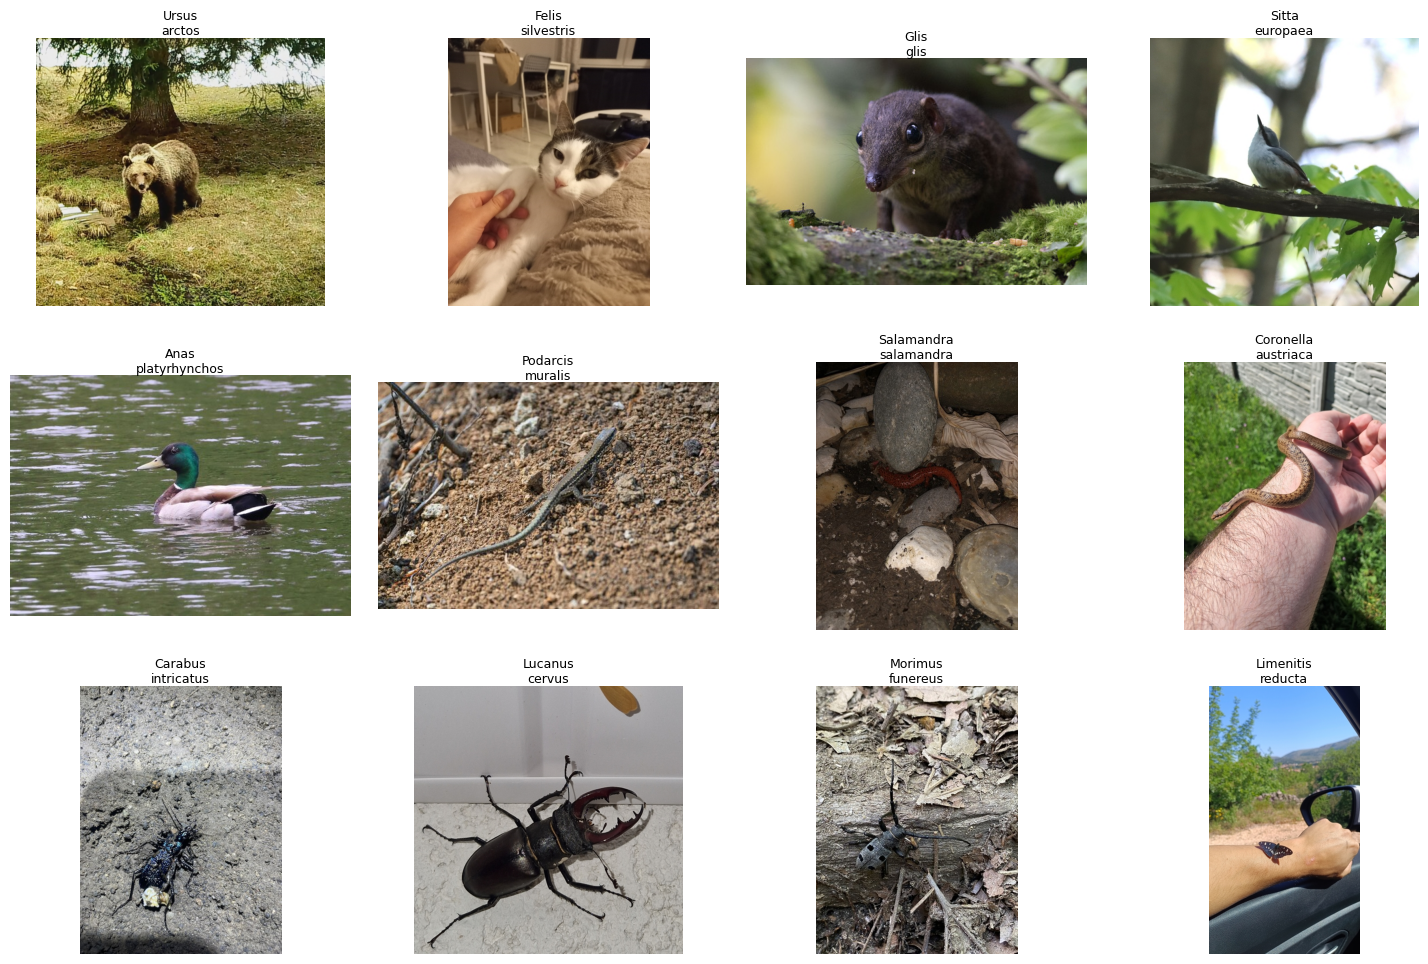

In [3]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
from pyinaturalist import get_observations

TARGET_SPECIES = [
    "Ursus arctos",         # Brown Bear
    "Felis silvestris",     # Wildcat
    "Glis glis",            # Edible Dormouse
    "Sitta europaea",       # Eurasian Nuthatch
    "Anas platyrhynchos",   # Mallard
    "Podarcis muralis",     # Wall Lizard
    "Salamandra salamandra", # Fire Salamander
    "Coronella austriaca",  # Smooth Snake
    "Carabus intricatus",   # Blue Ground Beetle
    "Lucanus cervus",       # Stag Beetle
    "Morimus funereus",     # Longhorn Beetle
    "Limenitis reducta"     # Southern White Admiral
]

def get_first_photo(species_name):
    """Get the first available photo URL for a species"""
    try:
        response = get_observations(
            taxon_name=species_name,
            quality_grade="research",
            per_page=1,
            has_photos=True,
            geo=True
        )

        if response and 'results' in response and response['results']:
            photos = response['results'][0].get('photos', [])
            if photos:
                return photos[0]['url'].replace('square', 'medium')
        return None
    except Exception as e:
        print(f"Error fetching {species_name}: {str(e)}")
        return None

def display_species_photos(species_list):
    """Display first photo for each species"""
    plt.figure(figsize=(15, 10))
    n_cols = 4
    n_rows = int(np.ceil(len(species_list) / n_cols))

    for i, species in enumerate(species_list):
        plt.subplot(n_rows, n_cols, i+1)
        photo_url = get_first_photo(species)

        if photo_url:
            try:
                response = requests.get(photo_url, timeout=10)
                img = Image.open(BytesIO(response.content))
                plt.imshow(img)
            except Exception as e:
                print(f"Error loading image for {species}: {str(e)}")
                display_missing_photo(species)
        else:
            display_missing_photo(species)

        plt.title(format_species_name(species), fontsize=9, pad=2)
        plt.axis('off')

    plt.tight_layout(pad=2.0, h_pad=2.0, w_pad=2.0)
    plt.show()

def display_missing_photo(species):
    """Display placeholder when photo is missing"""
    plt.text(0.5, 0.5, "No photo\navailable",
             ha='center', va='center', fontsize=8)
    plt.text(0.5, 0.2, format_species_name(species),
             ha='center', va='center', fontsize=8)

def format_species_name(scientific_name):
    """Format scientific name properly"""
    parts = scientific_name.split()
    if len(parts) == 2:
        return f"{parts[0]}\n{parts[1]}"
    return scientific_name

print("Fetching first available photos for each species...")
display_species_photos(TARGET_SPECIES)

In [8]:
def count_collected_photos(observations_df):
    """Count how many photos we collected for each species"""
    if observations_df is None or len(observations_df) == 0:
        print("No observations data available")
        return

    photo_counts = observations_df.groupby('target_species')['photos'].apply(
        lambda x: sum(len(photos) for photos in x if isinstance(photos, list))
    ).reset_index(name='photo_count')

    obs_counts = observations_df['target_species'].value_counts().reset_index()
    obs_counts.columns = ['target_species', 'observation_count']

    result = pd.merge(obs_counts, photo_counts, on='target_species')

    print("\nCollected Photo Counts:")
    print("======================")
    for _, row in result.iterrows():
        print(f"{row['target_species']}: ({row['photo_count']} photos from {row['observation_count']} observations)")

    print("\nSummary Statistics:")
    print(f"Total species collected: {len(result)}")
    print(f"Total photos collected: {result['photo_count'].sum()}")
    print(f"Average photos per species: {result['photo_count'].mean():.1f}")
    print(f"Species with most photos: {result.loc[result['photo_count'].idxmax(), 'target_species']} "
          f"({result['photo_count'].max()} photos)")

    return result

photo_stats = count_collected_photos(observations_df)


Collected Photo Counts:
Lynx lynx: (153 photos from 100 observations)
Ursus arctos: (271 photos from 100 observations)
Canis lupus: (130 photos from 100 observations)
Capreolus capreolus: (179 photos from 100 observations)
Sus scrofa: (174 photos from 100 observations)
Martes martes: (172 photos from 100 observations)
Vulpes vulpes: (186 photos from 100 observations)
Lutra lutra: (162 photos from 100 observations)
Rupicapra rupicapra: (159 photos from 100 observations)
Myotis myotis: (230 photos from 100 observations)
Sciurus vulgaris: (147 photos from 100 observations)
Lepus europaeus: (146 photos from 100 observations)
Felis silvestris: (126 photos from 100 observations)
Meles meles: (164 photos from 100 observations)
Neomys fodiens: (225 photos from 100 observations)
Cervus elaphus: (176 photos from 100 observations)
Dama dama: (153 photos from 100 observations)
Mustela nivalis: (203 photos from 100 observations)
Glis glis: (170 photos from 100 observations)
Talpa europaea: (124 ph

In [10]:
def augment_images(observations_df, target_count=100):
    """Equalize image counts through augmentation with size handling"""

    os.makedirs('augmented_images', exist_ok=True)

    species_counts = observations_df.groupby('target_species')['photo_url'].count()
    max_needed = target_count - species_counts.min()


    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    augmentation_results = []

    for species, count in tqdm(species_counts.items(), desc="Augmenting species"):
        species_df = observations_df[observations_df['target_species'] == species]
        needed = target_count - count

        if needed <= 0:
            augmentation_results.append({
                'Species': species,
                'Original Images': count,
                'Augmented Images': 0,
                'Total After Augmentation': count
            })
            continue


        base_size = (256, 256)
        images = []
        valid_urls = []

        for url in species_df['photo_url'].head(count):
            try:
                response = requests.get(url, timeout=10)
                img = Image.open(BytesIO(response.content))

                if img.mode != 'RGB':
                    img = img.convert('RGB')
                img = img.resize(base_size)
                images.append(np.array(img))
                valid_urls.append(url)
            except Exception as e:
                print(f"Skipping {url}: {str(e)}")
                continue

        if not images:
            augmentation_results.append({
                'Species': species,
                'Original Images': 0,
                'Augmented Images': 0,
                'Total After Augmentation': 0
            })
            continue


        images = np.array(images)
        print(f"Processing {species} with {images.shape[0]} images of size {images.shape[1:]}")


        augmented_count = 0
        save_prefix = f"{species.replace(' ', '_')}_aug"


        for i, batch in enumerate(datagen.flow(
            images,
            batch_size=min(4, needed),
            save_to_dir='augmented_images',
            save_prefix=save_prefix,
            save_format='jpg'
        )):
            augmented_count += batch.shape[0]
            if augmented_count >= needed:
                break
            if i > 20:
                break

        augmentation_results.append({
            'Species': species,
            'Original Images': len(valid_urls),
            'Augmented Images': augmented_count,
            'Total After Augmentation': len(valid_urls) + augmented_count
        })

    results_df = pd.DataFrame(augmentation_results)
    print("\nImage Augmentation Results:")
    print("==========================")
    print(results_df.to_string(index=False))


    print("\nAugmentation Summary:")
    print(f"Target images per species: {target_count}")
    print(f"Average augmentation per species: {results_df['Augmented Images'].mean():.1f} images")
    print(f"Species needing most augmentation: {results_df.loc[results_df['Augmented Images'].idxmax(), 'Species']} "
          f"({results_df['Augmented Images'].max()} images added)")

    return results_df

augmentation_report = augment_images(observations_df)

Augmenting species: 0it [00:00, ?it/s]

Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?


Augmenting species: 3it [00:35, 11.97s/it]

Processing Alcedo atthis with 98 images of size (256, 256, 3)
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?


Augmenting species: 7it [01:15, 10.57s/it]

Processing Apus apus with 94 images of size (256, 256, 3)
Processing Barbus balcanicus with 27 images of size (256, 256, 3)


Augmenting species: 10it [01:31,  8.39s/it]

Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?


Augmenting species: 11it [02:19, 14.96s/it]

Processing Bombina variegata with 96 images of size (256, 256, 3)
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?


Augmenting species: 13it [03:07, 17.83s/it]

Processing Bubo bubo with 96 images of size (256, 256, 3)
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?


Augmenting species: 19it [03:52, 11.86s/it]

Processing Carduelis carduelis with 96 images of size (256, 256, 3)
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps

Augmenting species: 20it [04:25, 14.39s/it]

Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?


Augmenting species: 24it [05:08, 12.96s/it]

Processing Columba palumbus with 94 images of size (256, 256, 3)
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Processing Corvus corax with 91 images of size (256, 256, 3)


Augmenting species: 26it [05:51, 14.88s/it]

Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No schem

Augmenting species: 29it [06:29, 14.12s/it]

Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?


Augmenting species: 30it [07:17, 18.72s/it]

Processing Emberiza citrinella with 94 images of size (256, 256, 3)
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?


Augmenting species: 34it [08:02, 15.41s/it]

Processing Falco peregrinus with 98 images of size (256, 256, 3)
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?


Augmenting species: 37it [08:52, 15.90s/it]

Processing Glis glis with 98 images of size (256, 256, 3)
Processing Hucho hucho with 77 images of size (256, 256, 3)


Augmenting species: 39it [09:37, 17.33s/it]

Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Processing Hyla arborea with 78 images of size (256, 256, 3)


Augmenting species: 40it [10:14, 20.15s/it]

Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Processing Jynx torquilla with 79 images of size (256, 256, 3)


Augmenting species: 41it [10:53, 23.33s/it]

Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No schem

Augmenting species: 47it [11:03, 10.55s/it]

Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?


Augmenting species: 56it [11:55,  7.87s/it]

Processing Miniopterus schreibersii with 92 images of size (256, 256, 3)
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?


Augmenting species: 58it [12:44, 10.40s/it]

Processing Motacilla alba with 98 images of size (256, 256, 3)
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?


Augmenting species: 63it [13:42, 10.79s/it]

Processing Nyctalus noctula with 98 images of size (256, 256, 3)
Processing Odonata with 29 images of size (256, 256, 3)


Augmenting species: 64it [13:57, 11.22s/it]

Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Processing Parus major with 90 images of size (256, 256, 3)


Augmenting species: 66it [14:44, 13.74s/it]

Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No schem

Augmenting species: 70it [15:07, 10.73s/it]

Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Processing Picus viridis with 76 images of size (256, 256, 3)


Augmenting species: 71it [15:48, 14.27s/it]

Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?


Augmenting species: 74it [16:37, 15.03s/it]

Processing Pyrrhocorax pyrrhocorax with 98 images of size (256, 256, 3)
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?


Augmenting species: 75it [17:30, 20.20s/it]

Processing Rana temporaria with 98 images of size (256, 256, 3)
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Processing Regulus regulus with 85 images of size (256, 256, 3)


Augmenting species: 76it [18:13, 23.87s/it]

Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?


Augmenting species: 84it [19:03, 12.45s/it]

Processing Sitta europaea with 96 images of size (256, 256, 3)
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?


Augmenting species: 86it [19:52, 14.72s/it]

Processing Streptopelia decaocto with 96 images of size (256, 256, 3)
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perha

Augmenting species: 87it [20:20, 16.22s/it]

Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Processing Sylvia atricapilla with 77 image

Augmenting species: 89it [20:57, 16.81s/it]

Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?


Augmenting species: 93it [21:43, 14.57s/it]

Processing Turdus merula with 92 images of size (256, 256, 3)
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?


Augmenting species: 94it [22:29, 18.73s/it]

Processing Turdus philomelos with 84 images of size (256, 256, 3)
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?
Skipping None: Invalid URL 'None': No scheme supplied. Perhaps you meant https://None?


Augmenting species: 100it [23:14, 13.95s/it]

Processing Upupa epops with 88 images of size (256, 256, 3)

Image Augmentation Results:
                  Species  Original Images  Augmented Images  Total After Augmentation
          Accipiter nisus              100                 0                       100
        Alburnus alburnus              100                 0                       100
            Alcedo atthis               98                 1                        99
       Anas platyrhynchos              100                 0                       100
          Anguis fragilis              100                 0                       100
           Apis mellifera              100                 0                       100
                Apus apus               94                 3                        97
        Aquila chrysaetos              100                 0                       100
            Ardea cinerea              100                 0                       100
        Barbus balcanicus               2

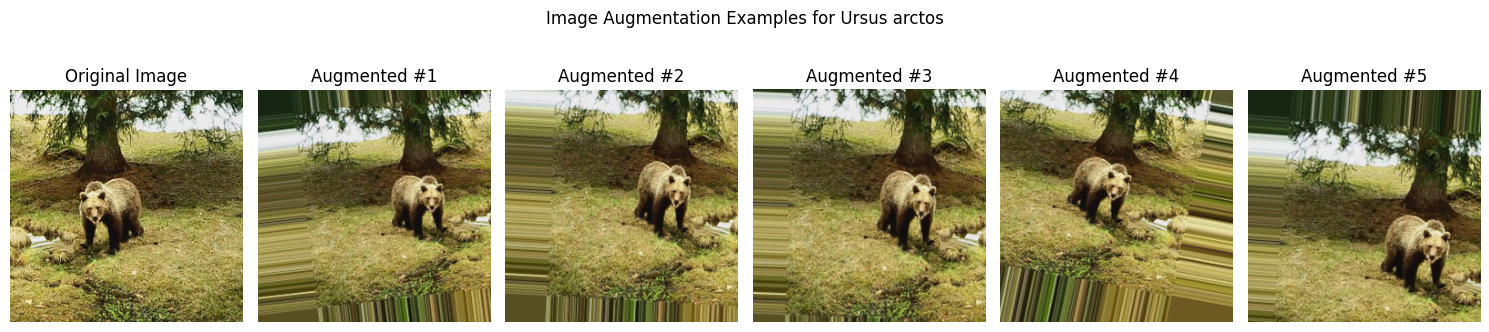

In [14]:
def display_augmentation_samples(observations_df, species_name="Lynx lynx", num_samples=5):
    """Display original and augmented images for a specific species"""
    if observations_df is None:
        print("No observation data available")
        return


    species_df = observations_df[observations_df['target_species'] == species_name]
    if len(species_df) == 0:
        print(f"No observations found for {species_name}")
        return


    img_url = None
    for url in species_df['photo_url']:
        if url:
            img_url = url
            break

    if not img_url:
        print(f"No valid images found for {species_name}")
        return


    try:
        response = requests.get(img_url, timeout=10)
        original_img = Image.open(BytesIO(response.content))
        if original_img.mode != 'RGB':
            original_img = original_img.convert('RGB')
        original_img = original_img.resize((256, 256))
        img_array = np.array(original_img).reshape((1,) + original_img.size + (3,))
    except Exception as e:
        print(f"Error loading image: {str(e)}")
        return


    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    plt.figure(figsize=(15, 3))
    plt.suptitle(f"Image Augmentation Examples for {species_name}", y=1.1)

    plt.subplot(1, num_samples + 1, 1)
    plt.imshow(original_img)
    plt.title("Original Image")
    plt.axis('off')

    aug_generator = datagen.flow(img_array, batch_size=1)
    for i in range(num_samples):
        augmented_img = next(aug_generator)[0].astype('uint8')
        plt.subplot(1, num_samples + 1, i + 2)
        plt.imshow(augmented_img)
        plt.title(f"Augmented #{i+1}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

display_augmentation_samples(observations_df, species_name="Ursus arctos", num_samples=5)